# **1. Finding the gradient of the given loss function**

Given,

$$
L(\theta) = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\widehat{y}_i) + (1 - y_i) \log(1 - \widehat{y}_i) \right]
 $$

Where,

$$
\widehat{y}_i = \sigma(x_i \cdot \theta) = \frac{1}{1 + e^{-x_i \cdot \theta}}
$$

Putting this into $ L(\theta) $ and simplifying, we get,

$$
L(\theta) = \frac{1}{n} \sum_{i=1}^{n} \left[(1-y_i)(x_i \cdot \theta) + \log(1+e^{-x_i \cdot \theta}) \right]
$$

$$
\Rightarrow \frac{\partial L(\theta)}{\partial \theta} = \frac{1}{n} \sum_{i=1}^{n} \left[(1-y_i)\frac{\partial (x_i \cdot \theta)}{\partial \theta} + \frac{\partial \log(1+e^{-x_i \cdot \theta})}{\partial \theta} \right]
$$

But, $$ \frac{\partial L(\theta)}{\partial \theta} = x_i ,  \frac{\partial \log(1+e^{-x_i \cdot \theta})}{\partial \theta} = \frac{-x_i}{1+e^{x_i \theta}}$$

Plugging this and resubstituting for $\widehat{y}_i$, we get the gradient of the logistic regression loss function is:

$$
\boxed{\nabla_\theta L(\theta) = \frac{1}{n} \sum_{i=1}^{n} (\widehat{y}_i - y_i) x_i}
$$



# **2. Plotting the logistic function $\sigma(z)$:**

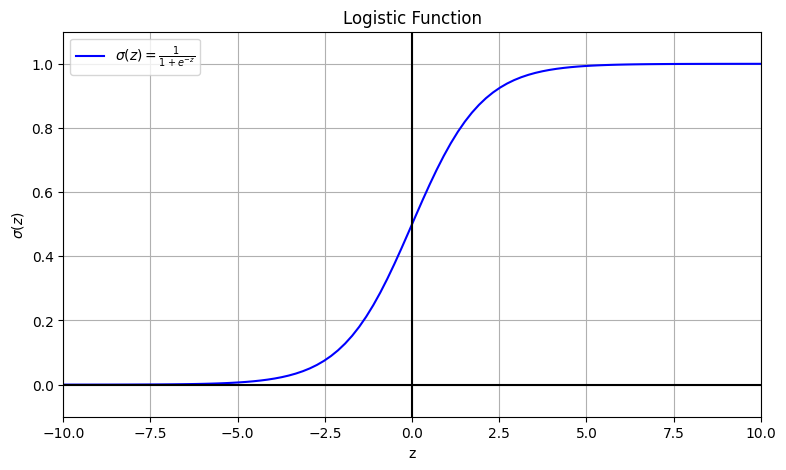

In [ ]:
# Importing all the necessary libraries for upcoming codes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sigma_z = sigmoid(z)

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(z, sigma_z, color='blue', label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Logistic Function')
plt.xlabel('z')
plt.ylabel(r'$\sigma(z)$')
plt.ylim(-0.1, 1.1)
plt.xlim(-10, 10)
plt.legend()
plt.grid()
plt.show()


**COMMENTS ON THE GRAPH OF $\sigma(z):$** The range is (0, 1), hence a good scaling function and valid for probability. The graph saturates to 1 for higher values of input and saturates at zero at values close to negative infinity. This suggests that Inputs that closely align with $\theta$ has higher probability of getting y(the output) equal to 1.

#**3. program for logistic regression:**

In [ ]:
# Function for logistic regression
def logistic_regression(theta, x):
    return sigmoid(np.dot(x, theta))

# Predicting the label
def predict(theta, x):
    prob = logistic_regression(theta, x)
    return (prob >= 0.5).astype(int)

#**4. Gradient descent algorithm:**
Here, I have used the data from "Gender Recognition by Voice" dataset by downloading voics.csv from kaggle. Since the final result is male/female voice (1 or 0) we can use logistic regression.

In [ ]:
# Uploading the file to collab.
from google.colab import files
uploaded = files.upload()

Saving 11e44e34-1d37-4086-8f9e-f680d06a0e9c.csv to 11e44e34-1d37-4086-8f9e-f680d06a0e9c.csv


In [ ]:
# Load the dataset
data = pd.read_csv('11e44e34-1d37-4086-8f9e-f680d06a0e9c.csv')
X = data.drop(columns=['label'])
Y = data['label'].values

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train = X_train.to_numpy()
y_train = Y_train
x_test = X_test.to_numpy()
y_test = Y_test

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize theta randomly.
theta = np.zeros(x_train.shape[1])

# cost function
def cost(theta, x, y):
    n = len(y)
    y_hat = logistic_regression(theta, x)
    cost = (-1/n) * (np.dot(y, np.log(y_hat)) + np.dot((1-y), np.log(1 - y_hat)))
    return cost

# Gradient function
def gradient(theta):
    n = len(y_train)
    gradient = np.zeros(x_train.shape[1])
    for i in range(n):
        xi = x_train[i]
        yi = y_train[i]
        y_hat_i = logistic_regression(theta, xi)
        gradient += (y_hat_i - yi) * xi
    gradient /= n
    return gradient

# Gradient descent
def gradient_descent(theta, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        grad = gradient(theta)
        theta -= learning_rate * grad

        value = cost(theta, x_train, y_train)
        cost_history.append(value)
        if i % 10 == 0:
            print(f"Iteration {i}, Cost: {value:.4f}")
    return theta, cost_history

# computing accuracy
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

optimal_theta, cost_history = gradient_descent(theta, learning_rate=0.1, iterations=200)

# Predict on test data
y_pred_test = predict(optimal_theta, x_test)

accuracy = compute_accuracy(y_test, y_pred_test)
print()
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

Iteration 0, Cost: 0.6382
Iteration 10, Cost: 0.4521
Iteration 20, Cost: 0.3782
Iteration 30, Cost: 0.3307
Iteration 40, Cost: 0.2970
Iteration 50, Cost: 0.2717
Iteration 60, Cost: 0.2520
Iteration 70, Cost: 0.2361
Iteration 80, Cost: 0.2230
Iteration 90, Cost: 0.2121
Iteration 100, Cost: 0.2029
Iteration 110, Cost: 0.1949
Iteration 120, Cost: 0.1880
Iteration 130, Cost: 0.1819
Iteration 140, Cost: 0.1766
Iteration 150, Cost: 0.1719
Iteration 160, Cost: 0.1676
Iteration 170, Cost: 0.1638
Iteration 180, Cost: 0.1603
Iteration 190, Cost: 0.1572

Accuracy on test data: 97.48%


#**5. Plotting convergence results**

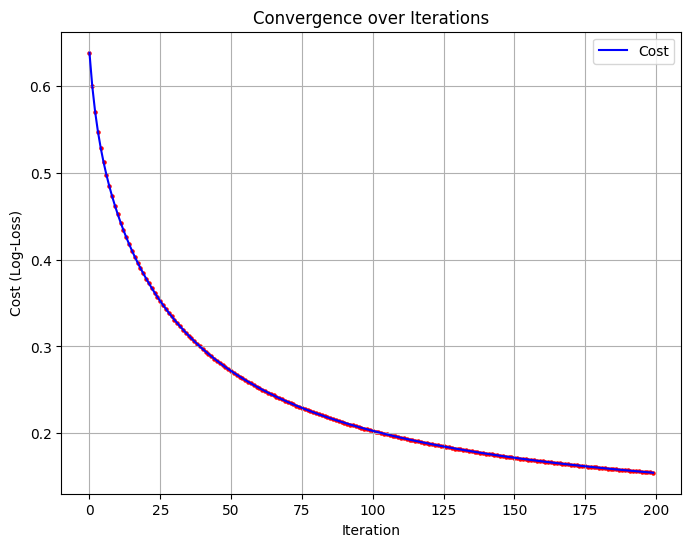

In [ ]:
# Plot the convergence with data points marked
plt.figure(figsize=(8, 6))

# Line plot for cost convergence
plt.plot(range(len(cost_history)), cost_history, color='b', label='Cost')

# Scatter plot to mark the data points
plt.scatter(range(len(cost_history)), cost_history, color='r', marker='o', s=5)

plt.title("Convergence over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost (Log-Loss)")
plt.grid(True)
plt.legend()  # Add legend to distinguish line and points
plt.show()
